In [2]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler 
import numpy as np
import statsmodels.api as sm
%matplotlib inline

In [3]:
#Read data file
CompetitorsPrices = pd.read_csv(r"G:\OneDrive - studenti.unitn.it\Projects\Helloprint_Algorithm\Algorithm_CompetitorsPrices_Posters_NL.csv")
Costs = pd.read_csv(r"G:\OneDrive - studenti.unitn.it\Projects\Helloprint_Algorithm\Algorithm_Costs_Posters_NL.csv")
Revenues = pd.read_csv(r"G:\OneDrive - studenti.unitn.it\Projects\Helloprint_Algorithm\Algorithm_Revenues_Posters_NL.csv")
SalesPrice = pd.read_csv(r"G:\OneDrive - studenti.unitn.it\Projects\Helloprint_Algorithm\Algorithm_SalesPrice_Posters_NL.csv")

In [4]:
#Check data info 
print(CompetitorsPrices.info())
print(Costs.info())
print(Revenues.info())
print(SalesPrice.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 3 columns):
sku                 3649 non-null object
competitor          3649 non-null object
competitor_price    3649 non-null float64
dtypes: float64(1), object(2)
memory usage: 57.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3277 entries, 0 to 3276
Data columns (total 18 columns):
sku                            3277 non-null object
salesprice_currency            3277 non-null object
supplier_currency              3277 non-null object
supplier_price                 3277 non-null float64
Production_days                3277 non-null int64
supplier_price_salescountry    3277 non-null float64
carrier_cost                   3277 non-null float64
carrier_currency               3277 non-null object
carrier_days                   3277 non-null int64
extra_days                     3277 non-null int64
carrier_cost_salescountry      3277 non-null float64
@Quantity                      3

In [5]:
#Check "sku" columns are unique
print(Costs["sku"].is_unique)
print(CompetitorsPrices["sku"].is_unique)
print(Costs["sku"].is_unique)
print(Revenues["sku"].is_unique)

True
False
True
True


In [6]:
#Merge Cost and Revenues
Costs_Revenues = pd.merge(Costs, Revenues, how="left", on="sku")
print(Costs_Revenues.head())
print(Costs_Revenues.info())

                   sku salesprice_currency supplier_currency  supplier_price  \
0   PO-135G-A2-50-40-4                 EUR               EUR            11.5   
1  PO-135G-A2-100-40-4                 EUR               EUR            20.5   
2   PO-135G-A2-50-40-1                 EUR               EUR            11.5   
3  PO-135G-A2-100-40-1                 EUR               EUR            20.5   
4   PO-135G-A3-50-40-4                 EUR               EUR             3.8   

   Production_days  supplier_price_salescountry  carrier_cost  \
0                2                         11.5          3.68   
1                2                         20.5          3.68   
2                0                         11.5          3.68   
3                0                         20.5          3.68   
4                2                          3.8          3.68   

  carrier_currency  carrier_days  extra_days  carrier_cost_salescountry  \
0              EUR             1           1         

In [7]:
# Create dataframe Revenues, Orders by Suppliers
Supplier_Revenues = pd.DataFrame(Costs_Revenues.groupby("supplier", as_index=False)[["Revenues", "Orders"]].sum().sort_values(by='Revenues', ascending=False))
print(Supplier_Revenues)
print(Supplier_Revenues.info())

                      supplier       Revenues  Orders
12        Verhaag Drukkerij BV  252152.519492    7693
6            Onlineprinters.nl  144820.160017    1790
13                Zalsman B.V.  119504.138302    4194
2      De Groot Drukkerij B.V.  101442.918042     862
7                        Probo   67781.095957    1467
8                    RPI print   56256.312263    1724
11  Verenigde Offset Bedrijven   53566.602450     255
9          TMB Image Center BV   41775.692439    1306
3          Drukkerij Wihabo BV   30493.081104     719
0                Control Media    6608.787134      93
10               Vanderheym BV    3661.960000      12
1                          DPP     668.220000      10
5                        Hecht     531.800000       1
4                   Flyeralarm       0.000000       0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 12 to 4
Data columns (total 3 columns):
supplier    14 non-null object
Revenues    14 non-null float64
Orders      14 non-null i

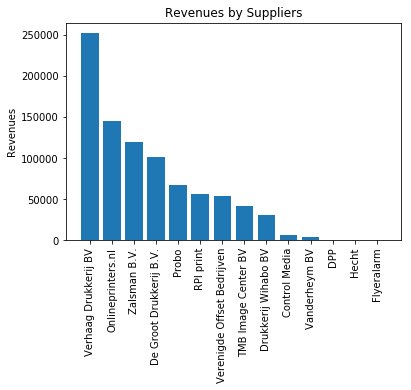

In [14]:
#Graph Revenues by Suppliers_
x = Supplier_Revenues["supplier"]
y = Supplier_Revenues["Revenues"]
plt.bar(x,y)
plt.xticks(rotation=90)
plt.ylabel('Revenues')
plt.title("Revenues by Suppliers")
plt.show()

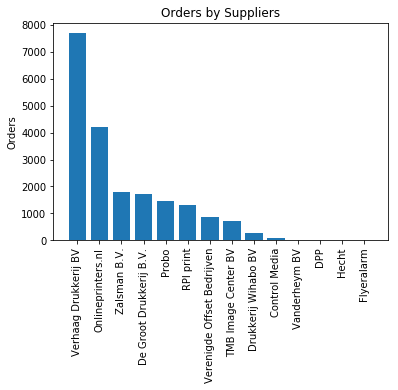

In [29]:
# Graph Orders by Suppliers
x = Supplier_Revenues["supplier"]
y = Supplier_Revenues["Orders"].sort_values(ascending=False)
plt.bar(x,y)
plt.xticks(rotation=90)
plt.ylabel("Orders")
plt.title("Orders by Suppliers")
plt.show()

In [34]:
# Add SalesPrice to Costs_Revenues dataframe (Merge)
Costs_Revenues = pd.merge(Costs_Revenues, SalesPrice, how="left", on="sku")
print(Costs_Revenues.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3277 entries, 0 to 3276
Data columns (total 25 columns):
sku                            3277 non-null object
salesprice_currency            3277 non-null object
supplier_currency              3277 non-null object
supplier_price                 3277 non-null float64
Production_days                3277 non-null int64
supplier_price_salescountry    3277 non-null float64
carrier_cost                   3277 non-null float64
carrier_currency               3277 non-null object
carrier_days                   3277 non-null int64
extra_days                     3277 non-null int64
carrier_cost_salescountry      3277 non-null float64
@Quantity                      3277 non-null int64
@Turnaround                    3277 non-null object
@Material                      3277 non-null object
@Size                          3277 non-null object
supplier_currency_original     3277 non-null object
supplier                       3277 non-null object
carrier  

In [35]:
# Add SalesPrice to CompetitorsPrices dataframe (Merge)
SalesPrice_CompetitorsPrices = pd.merge(SalesPrice, CompetitorsPrices, on="sku")
print(SalesPrice_CompetitorsPrices.head())
print(SalesPrice_CompetitorsPrices.info())

                   sku  Sales_Price   competitor  competitor_price
0   PO-135G-A2-50-40-4        27.45  Competitor1             44.37
1   PO-135G-A2-50-40-4        27.45  Competitor3             40.94
2   PO-135G-A2-50-40-4        27.45  Competitor4             27.86
3   PO-135G-A2-50-40-4        27.45  Competitor5             41.00
4  PO-135G-A2-100-40-4        28.45  Competitor1             47.22
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3648 entries, 0 to 3647
Data columns (total 4 columns):
sku                 3648 non-null object
Sales_Price         3648 non-null float64
competitor          3648 non-null object
competitor_price    3648 non-null float64
dtypes: float64(2), object(2)
memory usage: 114.0+ KB
None


In [36]:
# Create dataframe price_pivot grouped by sku 
Price_pivot = CompetitorsPrices.pivot_table(index="sku", columns="competitor", values="competitor_price")
Price_pivot.columns.name = None 
Price_pivot = Price_pivot.reset_index()  
print(Price_pivot.head())
print(Price_pivot.info())

                    sku  Competitor1  Competitor2  Competitor3  Competitor4  \
0   PO-100G-A0-100-40-1       149.92       211.93          NaN          NaN   
1   PO-100G-A0-100-40-2       126.75       179.18          NaN          NaN   
2   PO-100G-A0-100-40-4       119.34       168.70          NaN          NaN   
3  PO-100G-A0-1000-40-1       371.33       524.92          NaN          NaN   
4  PO-100G-A0-1000-40-2       324.79       459.12          NaN          NaN   

   Competitor5  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2198 entries, 0 to 2197
Data columns (total 6 columns):
sku            2198 non-null object
Competitor1    1077 non-null float64
Competitor2    332 non-null float64
Competitor3    1388 non-null float64
Competitor4    713 non-null float64
Competitor5    139 non-null float64
dtypes: float64(5), object(1)
memory usage: 94.5+ KB
None


In [37]:
# Add SalesPrice to Price_pivot (Merge)
Price_pivot = pd.merge(Price_pivot, SalesPrice, on="sku")

In [38]:
# Calculate Price Index for competitors

# Price Index for particular sku for particular competitor
Price_pivot["Price_Index_C1"] = Price_pivot["Competitor1"]/Price_pivot["Sales_Price"]*100
Price_pivot["Price_Index_C2"] = Price_pivot["Competitor2"]/Price_pivot["Sales_Price"]*100
Price_pivot["Price_Index_C3"] = Price_pivot["Competitor3"]/Price_pivot["Sales_Price"]*100
Price_pivot["Price_Index_C4"] = Price_pivot["Competitor4"]/Price_pivot["Sales_Price"]*100
Price_pivot["Price_Index_C5"] = Price_pivot["Competitor5"]/Price_pivot["Sales_Price"]*100

# Price Index average for particular sku (average  all competitors)
Price_pivot["Price_Index_allcompetitors"] = Price_pivot.loc[:,["Price_Index_C1","Price_Index_C2","Price_Index_C3", "Price_Index_C4", "Price_Index_C5"]].mean(axis=1)

# Price Index average for particular competitors (average  all sku)
PI_allC1 = Price_pivot["Price_Index_C1"].mean(axis=0)
PI_allC2 = Price_pivot["Price_Index_C2"].mean(axis=0)
PI_allC3 = Price_pivot["Price_Index_C3"].mean(axis=0)
PI_allC4 = Price_pivot["Price_Index_C4"].mean(axis=0)
PI_allC5 = Price_pivot["Price_Index_C5"].mean(axis=0)

#print(Price_pivot.head())
print(Price_pivot.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2197 entries, 0 to 2196
Data columns (total 13 columns):
sku                           2197 non-null object
Competitor1                   1077 non-null float64
Competitor2                   332 non-null float64
Competitor3                   1388 non-null float64
Competitor4                   712 non-null float64
Competitor5                   139 non-null float64
Sales_Price                   2197 non-null float64
Price_Index_C1                1077 non-null float64
Price_Index_C2                332 non-null float64
Price_Index_C3                1388 non-null float64
Price_Index_C4                712 non-null float64
Price_Index_C5                139 non-null float64
Price_Index_allcompetitors    2197 non-null float64
dtypes: float64(12), object(1)
memory usage: 231.7+ KB
None


Text(0.5, 1.0, 'Price_Index_C1')

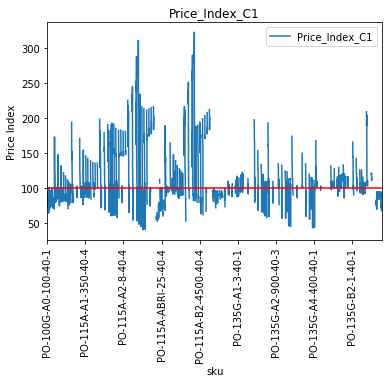

In [44]:
# Graph Price Index for particular sku for competitor 1 (Price_Index_C1)
Price_pivot.plot("sku", "Price_Index_C1", kind="line")
plt.axhline(y=100, color='r', linestyle='-')
plt.xticks(rotation=90)
plt.ylabel("Price Index")
plt.title("Price_Index_C1")

Text(0.5, 1.0, 'Price_Index_C2')

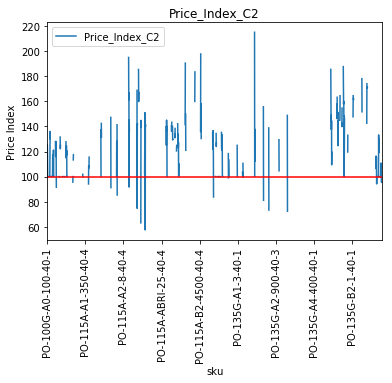

In [48]:
# Graph Price Index for particular sku for competitor 2 (Price_Index_C2)
Price_pivot.plot("sku", "Price_Index_C2", kind="line")
plt.axhline(y=100, color='r', linestyle='-')
plt.xticks(rotation=90)
plt.ylabel("Price Index")
plt.title("Price_Index_C2")

Text(0.5, 1.0, 'Price_Index_C3')

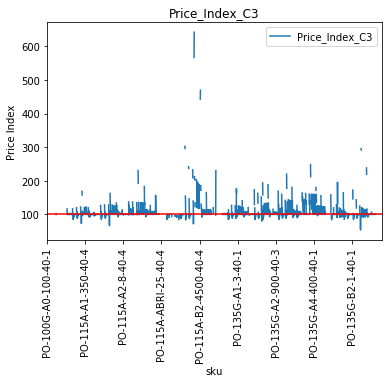

In [53]:
# Graph Price Index for particular sku for competitor 3 (Price_Index_C3)
Price_pivot.plot("sku", "Price_Index_C3", kind="line")
plt.axhline(y=100, color='r', linestyle='-')
plt.xticks(rotation=90)
plt.ylabel("Price Index")
plt.title("Price_Index_C3")

Text(0.5, 1.0, 'Price_Index_C4')

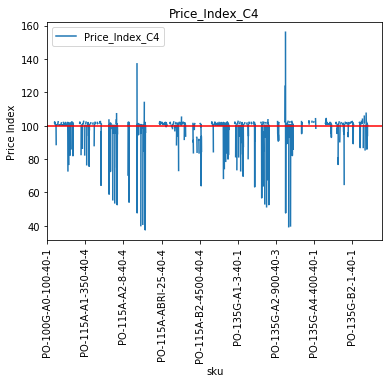

In [58]:
# Graph Price Index for particular sku for competitor 4 (Price_Index_C4)
Price_pivot.plot("sku", "Price_Index_C4", kind="line")
plt.axhline(y=100, color='r', linestyle='-')
plt.xticks(rotation=90)
plt.ylabel("Price Index")
plt.title("Price_Index_C4")

Text(0.5, 1.0, 'Price_Index_C5')

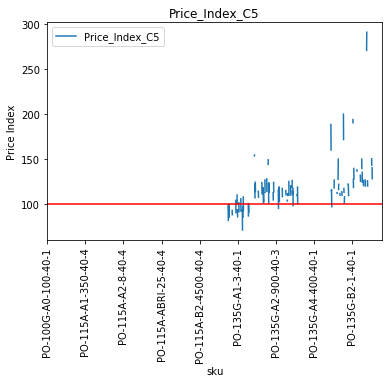

In [60]:
# Graph Price Index for particular sku for competitor 5 (Price_Index_C5)
Price_pivot.plot("sku", "Price_Index_C5", kind="line")
plt.axhline(y=100, color='r', linestyle='-')
plt.xticks(rotation=90)
plt.ylabel("Price Index")
plt.title("Price_Index_C5")

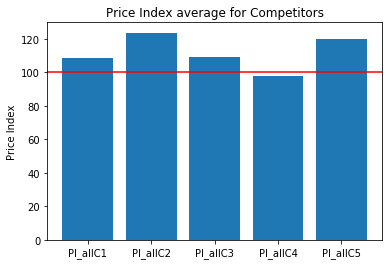

In [61]:
# Graph Price Index average for Competitors
objects = ('PI_allC1', 'PI_allC2', 'PI_allC3', 'PI_allC4', 'PI_allC5')
y_pos = np.arange(len(objects))
PI = np.array([PI_allC1,PI_allC2, PI_allC3, PI_allC4, PI_allC5])
plt.axhline(y=100, color='r', linestyle='-')
plt.bar(y_pos, PI, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('Price Index')
plt.title('Price Index average for Competitors')

plt.show()

In [62]:
# Add Revenues, Orders to Price_pivot dataframe (Merge)
Price_pivot = pd.merge(Price_pivot, Revenues, on="sku")
#print(Price_pivot.info())

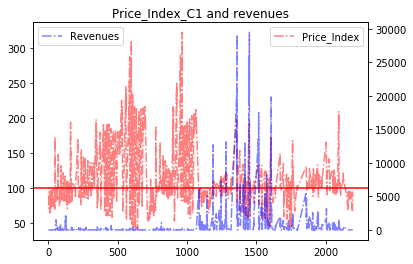

In [64]:
# Graph Price_Index_C1 and our revenues for each sku
df_C1 = Price_pivot[Price_pivot["Price_Index_C1"].notna()]
fig, ax = plt.subplots()
plt.plot(df_C1["Price_Index_C1"], '-.r', label='Price_Index', alpha= 0.5)
plt.axhline(y=100, color='r', linestyle='-')
plt.legend(loc=1)
ax.tick_params('vals', colors='r')
plt.title("Price_Index_C1 and revenues")

# Get second axis
ax2 = ax.twinx()
plt.plot(df_C1["Revenues"], '-.b', label="Revenues", alpha= 0.5)
plt.legend(loc=2)
ax.tick_params('vals', colors='b')

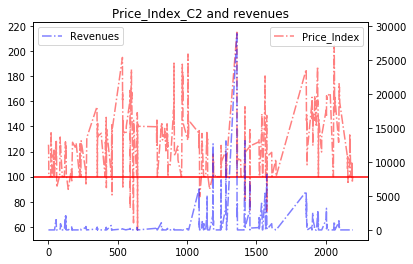

In [66]:
# Graph Price_Index_C2 and our revenues for each sku
df_C2 = Price_pivot[Price_pivot["Price_Index_C2"].notna()]
fig, ax = plt.subplots()
plt.plot(df_C2["Price_Index_C2"], '-.r', label='Price_Index', alpha= 0.5)
plt.axhline(y=100, color='r', linestyle='-')
plt.legend(loc=1)
ax.tick_params('vals', colors='r')
plt.title("Price_Index_C2 and revenues")
# Get second axis
ax2 = ax.twinx()
plt.plot(df_C2["Revenues"], '-.b', label="Revenues", alpha= 0.5)
plt.legend(loc=2)
ax.tick_params('vals', colors='b')

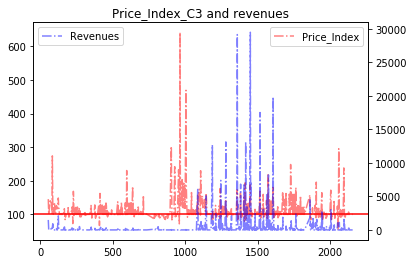

In [68]:
# Graph Price_Index_C3 and our revenues for each sku
df_C3 = Price_pivot[Price_pivot["Price_Index_C3"].notna()]
fig, ax = plt.subplots()
plt.plot(df_C3["Price_Index_C3"], '-.r', label='Price_Index', alpha= 0.5)
plt.axhline(y=100, color='r', linestyle='-')
plt.legend(loc=1)
ax.tick_params('vals', colors='r')
plt.title("Price_Index_C3 and revenues")
# Get second axis
ax2 = ax.twinx()
plt.plot(df_C3["Revenues"], '-.b', label="Revenues", alpha= 0.5)
plt.legend(loc=2)
ax.tick_params('vals', colors='b')

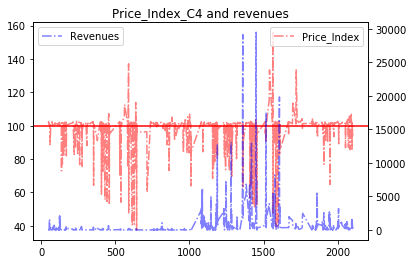

In [70]:
# Graph Price_Index_C4 and our revenues for each sku
df_C4 = Price_pivot[Price_pivot["Price_Index_C4"].notna()]
fig, ax = plt.subplots()
plt.plot(df_C4["Price_Index_C4"], '-.r', label='Price_Index', alpha= 0.5)
plt.axhline(y=100, color='r', linestyle='-')
plt.legend(loc=1)
ax.tick_params('vals', colors='r')
plt.title("Price_Index_C4 and revenues")
# Get second axis
ax2 = ax.twinx()
plt.plot(df_C4["Revenues"], '-.b', label="Revenues", alpha= 0.5)
plt.legend(loc=2)
ax.tick_params('vals', colors='b')

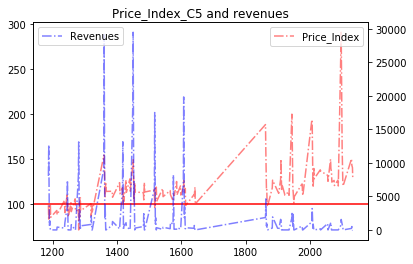

In [72]:
# Graph Price_Index_C5 and our revenues for each sku
df_C5 = Price_pivot[Price_pivot["Price_Index_C5"].notna()]
fig, ax = plt.subplots()
plt.plot(df_C5["Price_Index_C5"], '-.r', label='Price_Index', alpha= 0.5)
plt.axhline(y=100, color='r', linestyle='-')
plt.legend(loc=1)
ax.tick_params('vals', colors='r')
plt.title("Price_Index_C5 and revenues")
# Get second axis
ax2 = ax.twinx()
plt.plot(df_C5["Revenues"], '-.b', label="Revenues", alpha= 0.5)
plt.legend(loc=2)
ax.tick_params('vals', colors='b')

In [73]:
# Calculate Total_Cost, Markup, Profit
Costs_Revenues["Total_Cost"]= Costs_Revenues["supplier_price_salescountry"] + Costs_Revenues["carrier_cost_salescountry"]
Costs_Revenues["Markup"]= Costs_Revenues["Sales_Price"] - Costs_Revenues["Total_Cost"]
Costs_Revenues["Profit"] = Costs_Revenues["Markup"] * Costs_Revenues["Orders"]

In [74]:
# Add sku, Competitor1, Competitor2, Competitor3, Competitor4, Competitor5, Price_Index_allcompetitors to Costs_Revenues df (Merge)
Costs_Revenues = pd.merge(Costs_Revenues, Price_pivot.loc[:,["sku","Competitor1","Competitor2","Competitor3","Competitor4","Competitor5","Price_Index_allcompetitors"]], how="left", on="sku")
print(Costs_Revenues.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3277 entries, 0 to 3276
Data columns (total 34 columns):
sku                            3277 non-null object
salesprice_currency            3277 non-null object
supplier_currency              3277 non-null object
supplier_price                 3277 non-null float64
Production_days                3277 non-null int64
supplier_price_salescountry    3277 non-null float64
carrier_cost                   3277 non-null float64
carrier_currency               3277 non-null object
carrier_days                   3277 non-null int64
extra_days                     3277 non-null int64
carrier_cost_salescountry      3277 non-null float64
@Quantity                      3277 non-null int64
@Turnaround                    3277 non-null object
@Material                      3277 non-null object
@Size                          3277 non-null object
supplier_currency_original     3277 non-null object
supplier                       3277 non-null object
carrier  

In [75]:
#Calculate Min_CompetitorPrice, CostAdvantage
Costs_Revenues["Min_CompetitorPrice"]= Costs_Revenues.loc[:,["Competitor1","Competitor2","Competitor3","Competitor4","Competitor5"]].min(axis=1)
Costs_Revenues["CostAdvantage"] = (Costs_Revenues["Total_Cost"] - Costs_Revenues["Min_CompetitorPrice"])*100/Costs_Revenues["Min_CompetitorPrice"]
print(Costs_Revenues.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3277 entries, 0 to 3276
Data columns (total 36 columns):
sku                            3277 non-null object
salesprice_currency            3277 non-null object
supplier_currency              3277 non-null object
supplier_price                 3277 non-null float64
Production_days                3277 non-null int64
supplier_price_salescountry    3277 non-null float64
carrier_cost                   3277 non-null float64
carrier_currency               3277 non-null object
carrier_days                   3277 non-null int64
extra_days                     3277 non-null int64
carrier_cost_salescountry      3277 non-null float64
@Quantity                      3277 non-null int64
@Turnaround                    3277 non-null object
@Material                      3277 non-null object
@Size                          3277 non-null object
supplier_currency_original     3277 non-null object
supplier                       3277 non-null object
carrier  

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 <a list of 8 Text xticklabel objects>)

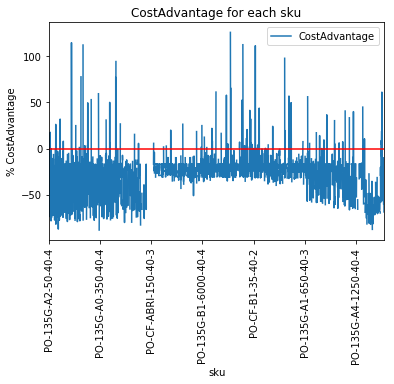

In [76]:
# Graph CostAdvantage for each sku
Costs_Revenues.plot("sku", "CostAdvantage", kind="line")
plt.ylabel("% CostAdvantage")
plt.title("CostAdvantage for each sku")
plt.axhline(y=0, color='r', linestyle='-')
plt.xticks(rotation=90)

In [77]:
# Correlation between CostAdvantage and number of Orders
Costs_Revenues['CostAdvantage'].corr(Costs_Revenues['Orders'])

-0.14113479010872912

In [78]:
#Count numbers of missing value
print(Costs_Revenues["Price_Index_allcompetitors"].isna().values.sum() )
#Count non-zero revenues
print ((Costs_Revenues["Revenues"]!=0).sum())

1080
953


In [79]:
#Impute missing values of Price_Index_allcompetitors by 100%
Costs_Revenues.loc[Costs_Revenues["Price_Index_allcompetitors"].isna(),["Price_Index_allcompetitors"]]=100

In [80]:
# Create train dataset for Machine Learning Linear Regression 
train = Costs_Revenues[Costs_Revenues['Revenues'] > 0]
X_train = train.loc[:,["supplier_price_salescountry", "carrier_cost_salescountry", "carrier_days", "extra_days","Price_Index_allcompetitors"]]
y_train = train.loc[:,["Revenues"]]

In [81]:
# Create test dataset for Machine Learning Linear Regression 
test = Costs_Revenues[Costs_Revenues['Revenues'] == 0]
X_test = test.loc[:,["supplier_price_salescountry", "carrier_cost_salescountry", "carrier_days", "extra_days","Price_Index_allcompetitors"]]
y_test = test.loc[:,["Revenues"]]

In [82]:
# Instantiate MinMaxScaler and use it to rescale
scaler01 = MinMaxScaler(feature_range=(0, 1))
rescaled_X_train = scaler01.fit_transform(X_train)
rescaled_X_test = scaler01.fit_transform(X_test)
rescaled_y_train = scaler01.fit_transform(y_train)

In [83]:
# Instantiate a LinearRegression with default parameter values
ligreg = LinearRegression()
# Fit ligreg to the train set
ligreg.fit(rescaled_X_train,rescaled_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
# Use LinearRegression to predict instances from the test set
y_pred = ligreg.predict(rescaled_X_test)

In [85]:
# LinearRegression Intercept  
ligreg.intercept_

array([0.0163426])

In [86]:
# LinearRegression Coefficient 
#"supplier_price_salescountry", "carrier_cost_salescountry", "carrier_days", "extra_days","Price_Index_allcompetitors"]]
# print coefficients
ligreg.coef_

array([[-0.0063129 , -0.02693092, -0.01000462,  0.00530029,  0.11687582]])

In [87]:
#consider  magnitude coefficient times std of corresponding parameter
np.std(rescaled_X_train, 0)*ligreg.coef_
#"supplier_price", "carrier_cost, "carrier_days", "extra_days","Price_Index"

array([[-0.00067968, -0.00251649, -0.00197767,  0.00264604,  0.00813827]])

In [88]:
#R-squared 
ligreg.score(rescaled_X_train,rescaled_y_train)

0.013815968007547029

In [89]:
#Summary statistics 
X2 = sm.add_constant(rescaled_X_train)
est = sm.OLS(rescaled_y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     2.653
Date:                Mon, 27 May 2019   Prob (F-statistic):             0.0216
Time:                        11:43:58   Log-Likelihood:                 1024.1
No. Observations:                 953   AIC:                            -2036.
Df Residuals:                     947   BIC:                            -2007.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0163      0.014      1.139      0.2

In [90]:
# Transform predict results to Score for each SKU
y_pred_df= pd.DataFrame(y_pred)
rescaled_y_train_df= pd.DataFrame(rescaled_y_train)
rescaled_y_train_df.columns=["Score"]
y_pred_df.columns=["Score"]

#Add Score to data_train
data_train = pd.concat([train , rescaled_y_train_df], axis= 1)

#Add Score to data_predict
test.reset_index(drop=True, inplace=True)
data_predict = pd.concat([test, y_pred_df], axis= 1)

In [91]:
# Combine data_train and data_predict to one data
data = pd.concat([data_train, data_predict], axis= 0)

#Save data as .csv file
data.to_csv(r'C:\Users\LE HOANG NHAN\Desktop\data.csv')

In [92]:
# 5 skus have highest scores
print(data.loc[:,["sku", "Revenues",'Score']].sort_values(by='Score', ascending=False).head(5))

                   sku     Revenues     Score
0   PO-135G-A2-50-40-4  29479.26729  1.000000
1  PO-135G-A2-100-40-4  29136.57392  0.988372
2   PO-135G-A2-50-40-1  25775.39229  0.874325
3  PO-135G-A2-100-40-1  19935.51579  0.676174
4   PO-135G-A3-50-40-4  19830.65735  0.672616


In [47]:
# 5 skus have lowest scores
print(data.loc[:,["sku","Revenues",'Score']].sort_values(by='Score', ascending=False).tail(5))

                      sku  Revenues     Score
950     PO-115A-B1-1-40-1     10.75  0.000112
951     PO-135G-A4-7-40-4      9.57  0.000072
942  PO-115A-A3-4000-40-1      0.00  0.000054
952     PO-135G-A4-3-40-2      7.45  0.000000
820  PO-115A-A3-5000-40-1      0.00 -0.000596
